# Part I: Multiclass

**Number Classification Example**
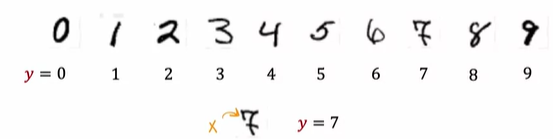

multiclass classification problem: y can take more than two possible values

**Multiclass Classification Example**
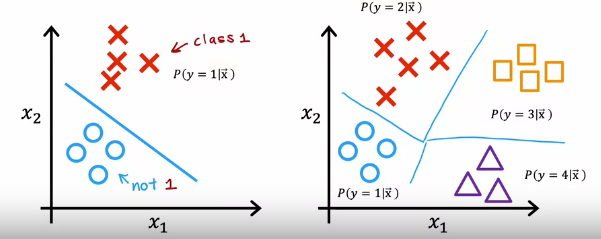

# Part II: Softmax

**Logistic Regression** (2 possible values)  
$z = \vec{w} \cdot \vec{x} + b$  
$a_{1} = g(z) = \frac{1}{1 + e^{-z}} = P(y = 1 | \vec{x})$  
$a_{2} = 1 - a_{1} = P(y = 0 | \vec{x})$

**Softmax Regression** (4 possible values)  
- $z_{1} = \vec{w_{1}} \cdot \vec{x} + b_{1}$  
$a_{1} = \frac{e^{z_{1}}}{e^{z_{1}} + e^{z_{2}} + e^{z_{3}} + e^{z_{4}}}$  
$= P(y = 1 | \vec{x})$  

- $z_{2} = \vec{w_{2}} \cdot \vec{x} + b_{2}$  
$a_{2} = \frac{e^{z_{2}}}{e^{z_{1}} + e^{z_{2}} + e^{z_{3}} + e^{z_{4}}}$  
$= P(y = 2 | \vec{x})$  

- $z_{3} = \vec{w_{3}} \cdot \vec{x} + b_{3}$  
$a_{3} = \frac{e^{z_{3}}}{e^{z_{1}} + e^{z_{2}} + e^{z_{3}} + e^{z_{4}}}$  
$= P(y = 3 | \vec{x})$  

- $z_{4} = \vec{w_{4}} \cdot \vec{x} + b_{4}$  
$a_{4} = \frac{e^{z_{4}}}{e^{z_{1}} + e^{z_{2}} + e^{z_{3}} + e^{z_{4}}}$  
$= P(y = 4 | \vec{x})$

For N possible outputs y = 1, ..., N  
- $z_{j} = \vec{w_{j}} \cdot \vec{x} + b_{j}$ where j = 1, ..., N  
- $a_{j} = \frac{e^{z_{j}}}{\sum_{k = 1}^{N}e^{z_{k}}} = P(y = j | \vec{x})$

**Cost**

*Logistic Regression*  
- $z = \vec{w} \cdot \vec{x} + b$  
$a_{1} = g(z) = \frac{1}{1 + e^{-z}} = P(y = 1 | \vec{x})$  
$a_{2} = 1 - a_{1} = P(y = 0 | \vec{x})$  

- $loss = -y log(a_{1}) - (1 - y) log(1 - a_{1})$  
$= -y log(a_{1}) - (1 - y) log(a_{2})$
- $J(\vec{w}, b)$ = average loss

*Softmax Regression*  
- $a_{j} = \frac{e^{z_{j}}}{\sum_{k = 1}^{N}e^{z_{k}}} = P(y = j | \vec{x})$  
- $loss(a_{1}, ..., a_{N}, y) = - log(a_{N})$ if y = N

# Part III: Neural Network with Softmax Output

**Number Classification Example**
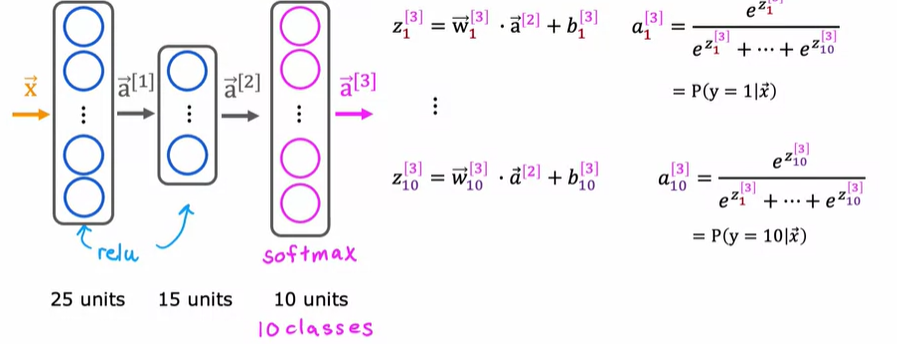

- The output layer will be a softmax layer with 10 distinct neurons
- Then $a^{[3]}$ will have 10 values that compute the probability accordingly to each neuron

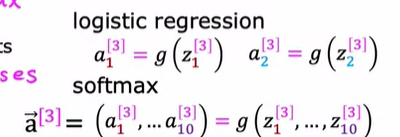

- From logistic regression, each value of a is a function of its corresponding z
- For softmax regression, each value of a its depended on all values of z

**MNIST with Softmax**

In [ ]:
#Step 1: Specify the model

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units = 25, activation = 'relu'), 
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])

In [ ]:
#Step 2: Specify loss and cost
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss = SparseCategoricalCrossentropy())

In [ ]:
#Step 3: Training on data to minimize the cost
model.fit(X, y, epochs = 100)

# Part IV: Improve Implementation of Softmax

**Numerical Roundoff Errors**

In [2]:
x1 = 2.0 / 1000
print(f'{x1: .18f}')

 0.002000000000000000


In [3]:
x2 = 1 + (1 / 1000) - (1 - 1/1000)
print(f'{x2: .18f}')

 0.001999999999999891


We see the loss of precision due to the extra computation that the machine must take

**Logistic Regression**
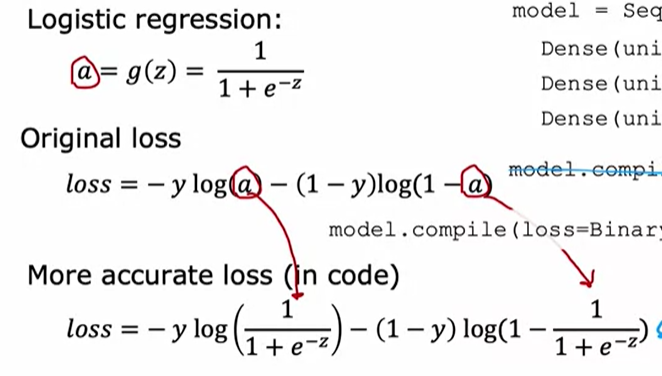

In [ ]:
model = Sequential([
    Dense(units = 25, activation = 'relu'), 
    Dense(units = 15, activation = 'relu'),
    Dense(units = 1, activation = 'linear')
])
#change the final layer to linear

model.compile(loss = BinaryCrossentropy(from_logits = True))
#add the parameter

model.fit(X, y, epochs = 100)
#fit the model

logits = model(X)
f_x = tf.nn.sigmoid(logits)
#predict the model

**Softmax Regression**
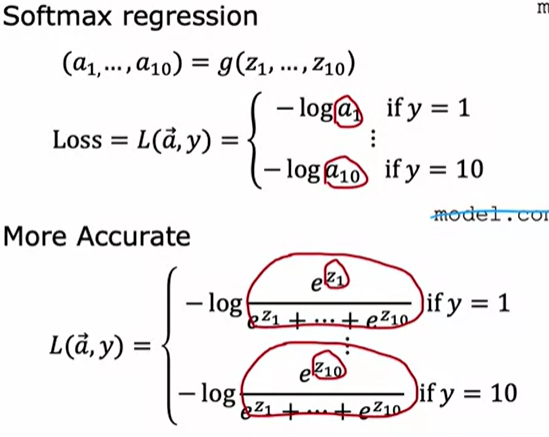

In [ ]:
model = Sequential([
    Dense(units = 25, activation = 'relu'), 
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'linear')
])
#change the final layer activation function to linear

model.compile(loss = SparseCategoricalCrossentropy(from_logits = True))
#add the necessary parameter

model.fit(X, y, epochs = 100)
#fit the model

logits = model(X)
f_x = tf.nn.softmax(logits)
#predict the model

## Part V: Classification with Multiple Outputs

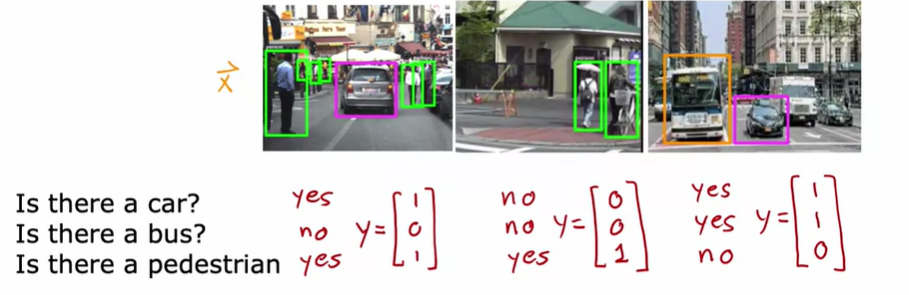
The output y will be a vector with n columns, corresponding to n labels

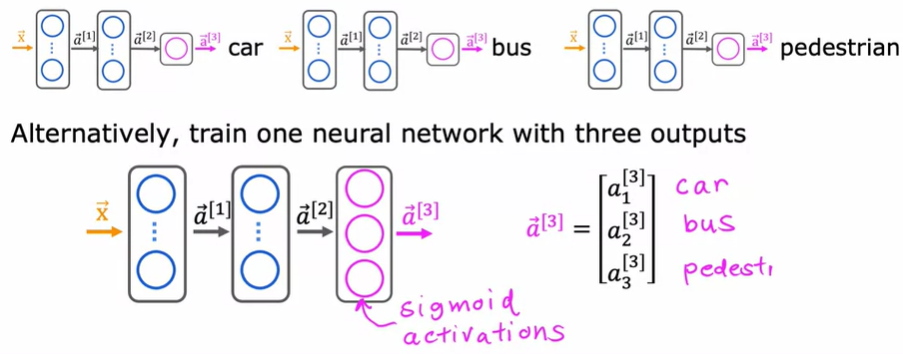
- instead of making 3 neural networks for each task, we can combine them into one (using sigmoid activation)
- notice that multilabel classification differs from multiclass classification